In [1]:
import pandas as pd
import numpy as np

In [2]:
orig=pd.read_csv("D://DataScience/Assignments/11-Decision Trees/Fraud_check.csv")
orig.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


## Creating new variable to identify the data set as "Risky" and "Good" based Taxable income < 30000

In [4]:
orig["validation"]="X"

In [5]:
orig

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,validation
0,NO,Single,68833,50047,10,YES,X
1,YES,Divorced,33700,134075,18,YES,X
2,NO,Married,36925,160205,30,YES,X
3,YES,Single,50190,193264,15,YES,X
4,NO,Married,81002,27533,28,NO,X
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,X
596,YES,Divorced,69967,55369,2,YES,X
597,NO,Divorced,47334,154058,0,YES,X
598,YES,Married,98592,180083,17,NO,X


In [8]:
orig.loc[orig["Taxable.Income"]>=30000,"validation"]="Good"
orig.loc[orig["Taxable.Income"]<=30000,"validation"]="Risky"

In [7]:
orig

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,validation
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


Good     476
Risky    124
Name: validation, dtype: int64


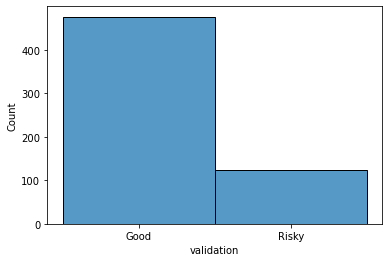

In [9]:
import seaborn as sns
sns.histplot(orig['validation'])
print(orig.validation.value_counts() )

In [10]:
##Droping the Taxable income variable
orig.drop(["Taxable.Income"],axis=1,inplace=True)

In [11]:
orig.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [170]:
orig.head()

,undergrad,marital,population,experience,urban,validation
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [12]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
orig['undergrad']= label_encoder.fit_transform(orig['undergrad'])
orig['marital']= label_encoder.fit_transform(orig['marital']) 
orig['urban']= label_encoder.fit_transform(orig['urban']) 
orig['validation']= label_encoder.fit_transform(orig['validation']) 

In [139]:
orig.head()

,undergrad,marital,taxableincome,population,experience,urban,validation
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [13]:
x=orig.iloc[:,0:5]
x.head()

,undergrad,marital,population,experience,urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [14]:
y=orig.iloc[:,5]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: validation, dtype: int32

In [15]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)
print(x_train.shape," ",x_test.shape," ",y_train.shape," ",y_test.shape)

(480, 5)   (120, 5)   (480,)   (120,)


## Building  Decision Tree Classifier using Entropy

In [16]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
model1 = DecisionTreeClassifier(criterion ='entropy',max_depth=5)#Max_depth is tree size
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

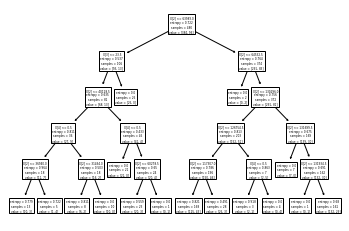

In [17]:
#PLot the decision tree
tree.plot_tree(model1);

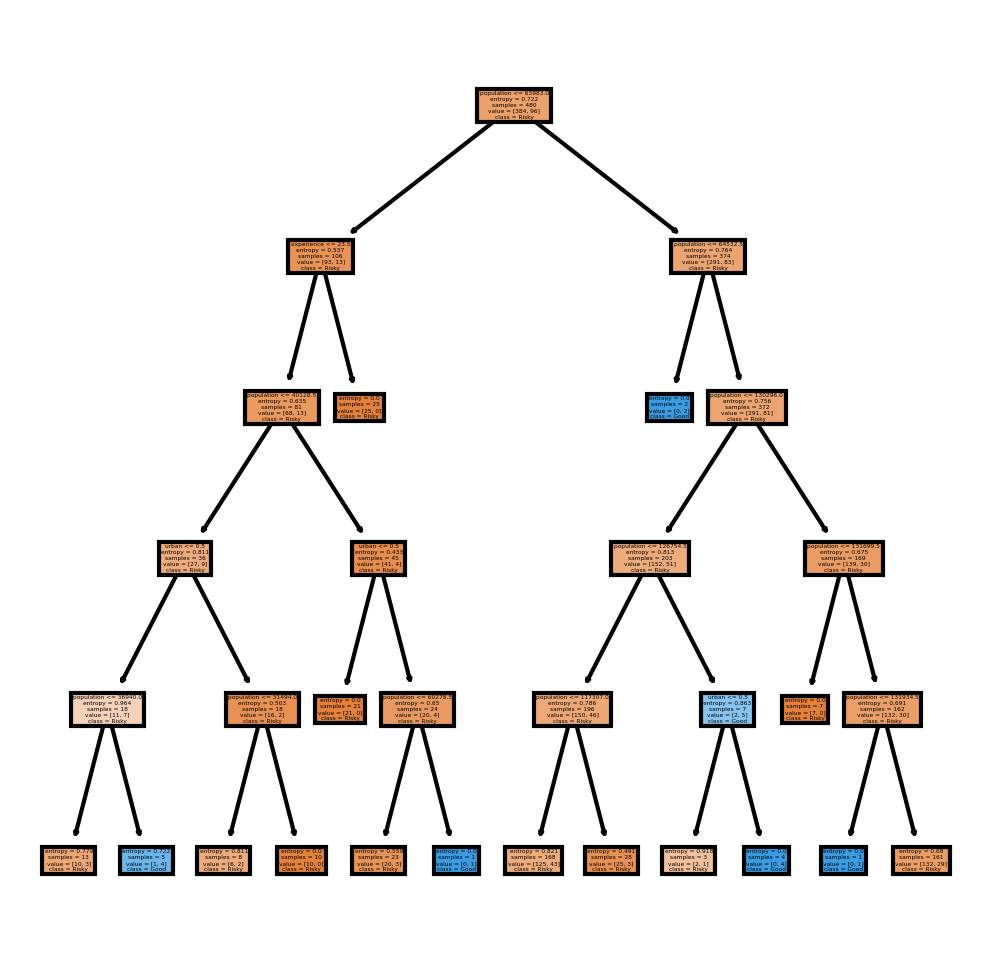

In [187]:
import matplotlib.pyplot as plt
fn=['undergrad','marital','population','experience','urban'] # Feature Name
cn=['Risky', 'Good'] # class Names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [18]:
#Predicting on test data
pred1 = model1.predict(x_test) # predicting on test data set 
pd.Series(pred1).value_counts() # getting the count of each category  

0    117
1      3
dtype: int64

In [19]:
pred1 

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
#confusion matrxi
pd.crosstab(y_test,pred1)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
validation,,
0,91,1
1,26,2


In [21]:
# Accuracy 
np.mean(pred1==y_test)

0.775

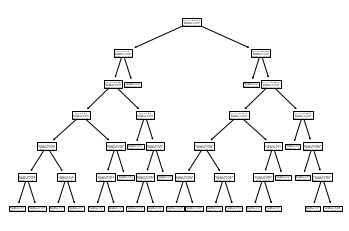

In [22]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
model2 = DecisionTreeClassifier(criterion ='entropy',max_depth=6)#Max_depth is tree size
model2.fit(x_train,y_train)
#PLot the decision tree
tree.plot_tree(model2);

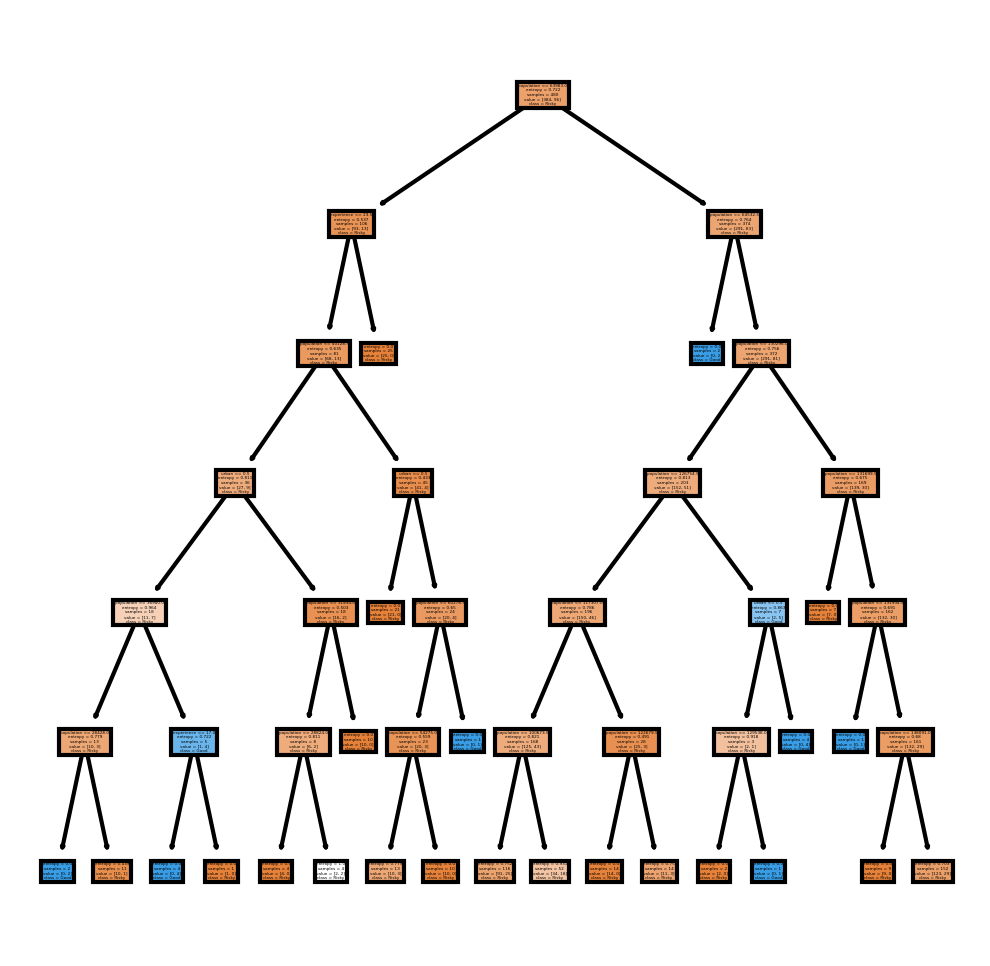

In [201]:
fn=['undergrad','marital','population','experience','urban'] # Feature Name
cn=['Risky', 'Good'] # class Names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [202]:
#Predicting on test data
pred2 = model2.predict(x_test) # predicting on test data set 
pd.Series(pred2).value_counts() # getting the count of each category  

0    116
1      4
dtype: int64

In [203]:
#confusion matrxi
pd.crosstab(y_test,pred2)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
validation,,
0,90,2
1,26,2


In [204]:
# Accuracy 
np.mean(pred2==y_test)

0.7666666666666667

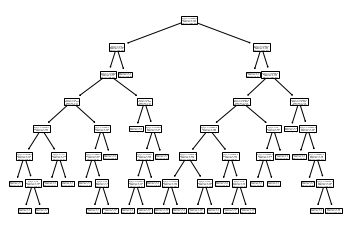

In [205]:
model3 = DecisionTreeClassifier(criterion ='entropy',max_depth=7)#Max_depth is tree size
model3.fit(x_train,y_train)
#PLot the decision tree
tree.plot_tree(model3);

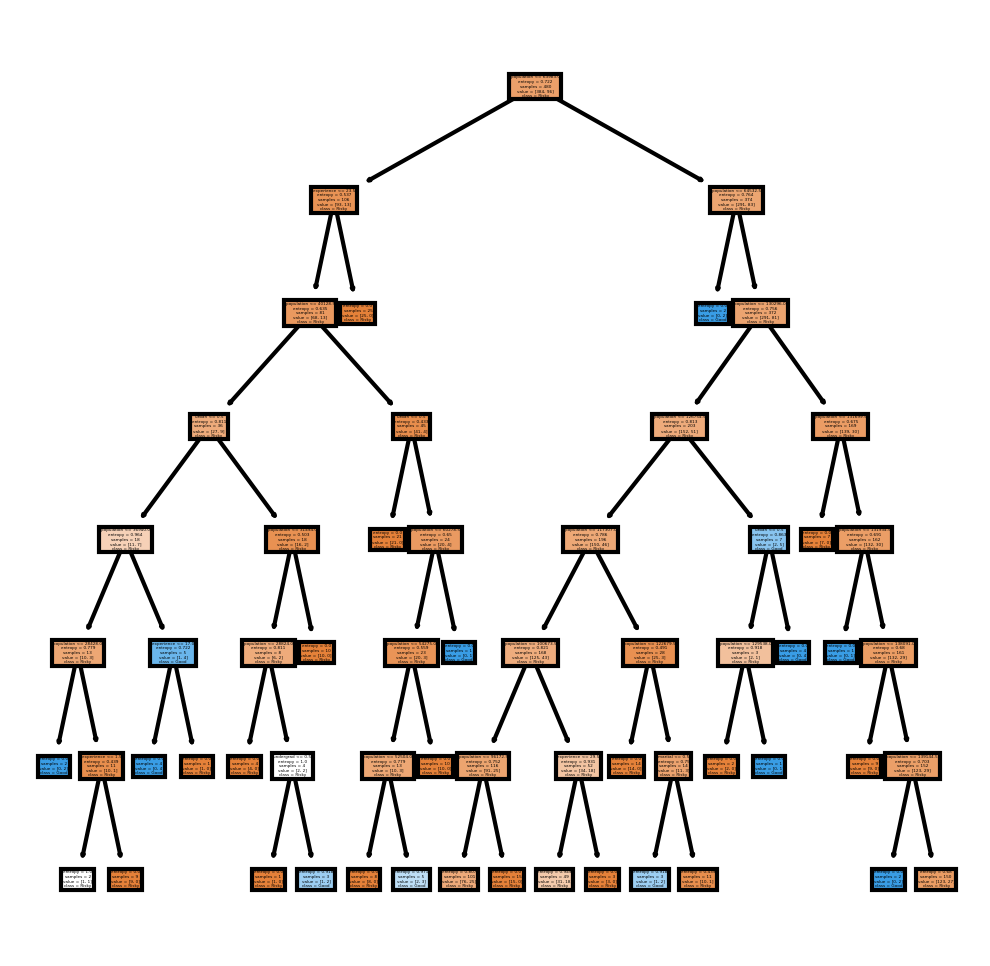

In [206]:
fn=['undergrad','marital','population','experience','urban'] # Feature Name
cn=['Risky', 'Good'] # class Names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model3,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [207]:
#Predicting on test data
pred3 = model3.predict(x_test) # predicting on test data set 
pd.Series(pred3).value_counts() # getting the count of each category 

0    113
1      7
dtype: int64

In [208]:
#confusion matrxi
pd.crosstab(y_test,pred3) 

col_0,0,1
validation,,
0,87,5
1,26,2


In [209]:
# Accuracy 
np.mean(pred3==y_test)

0.7416666666666667

Model1 with 5 levels gives good accuracy 77.5%

## Model 4 with CART method

In [23]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5) 

In [30]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [31]:
#Prediction and computing the accuracy
pred_gini=model_gini.predict(x_test)
np.mean(pred_gini==y_test) 

0.7666666666666667

In [ ]:
Model14 with 5 levels gives good accuracy 76.7% in CART method